## FEATURE 2


Are drugs in lower tiers less likely to require prior authorization?
(This helps reveal whether placement in lower tiers is associated with fewer administrative barriers, potentially making access to these medications easier for patients.)

Do tiers with lower patient cost often have fewer step therapy requirements?
(This can indicate whether patients using lower-tier medicines also experience less restrictive access, supporting easier and faster treatment initiation.)

Is there a tier where a much higher percentage of drugs require quantity limits?
(This provides insight into whether cost-control measures like quantity limits are concentrated at specific tiers, which could affect medication adherence and clinical outcomes.)

Do higher drug tiers tend to cluster drugs with multiple restrictions (prior authorization, quantity limits, and step therapy) compared to lower tiers?
(This helps determine if high-tier placement not only increases out-of-pocket costs but also layers on additional hurdles, further deterring access for patients.)

Are there any tiers where policy restriction rates stand out as outliers compared to other tiers?
(This can help identify if certain strategy shifts—like moving drugs between tiers—could notably impact restriction prevalence and overall patient or prescriber burden.)

In [1]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

conn = psycopg2.connect(
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    dbname=os.getenv("DB_NAME"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

In [2]:
# Load basic drugs formulary data
formulary_query = """
SELECT
    tier_level_value,
    quantity_limit_yn,
    prior_authorization_yn,
    step_therapy_yn
FROM basic_drugs_formulary;
"""

basic_drugs_formulary_df = pd.read_sql(formulary_query, conn)

C:\Users\amsub\AppData\Local\Temp\ipykernel_65456\4216593277.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  basic_drugs_formulary_df = pd.read_sql(formulary_query, conn)


In [ ]:
# Display sample to confirm load 
print(basic_drugs_formulary_df.head())

In [ ]:
policy_cols = ['prior_authorization_yn', 'quantity_limit_yn', 'step_therapy_yn']

policy_summary = {}
for col in policy_cols:
    summary = (
        basic_drugs_formulary_df
        .groupby('tier_level_value')[col]
        .apply(lambda x: (x == 'Y').mean() * 100)
        .reset_index()
        .rename(columns={col: f'percent_{col}_yes'})
    )
    policy_summary[col] = summary

# Merge summaries into one DataFrame
policy_summary_df = policy_summary[policy_cols[0]]
for col in policy_cols[1:]:
    policy_summary_df = policy_summary_df.merge(policy_summary[col], on='tier_level_value')

print(policy_summary_df)



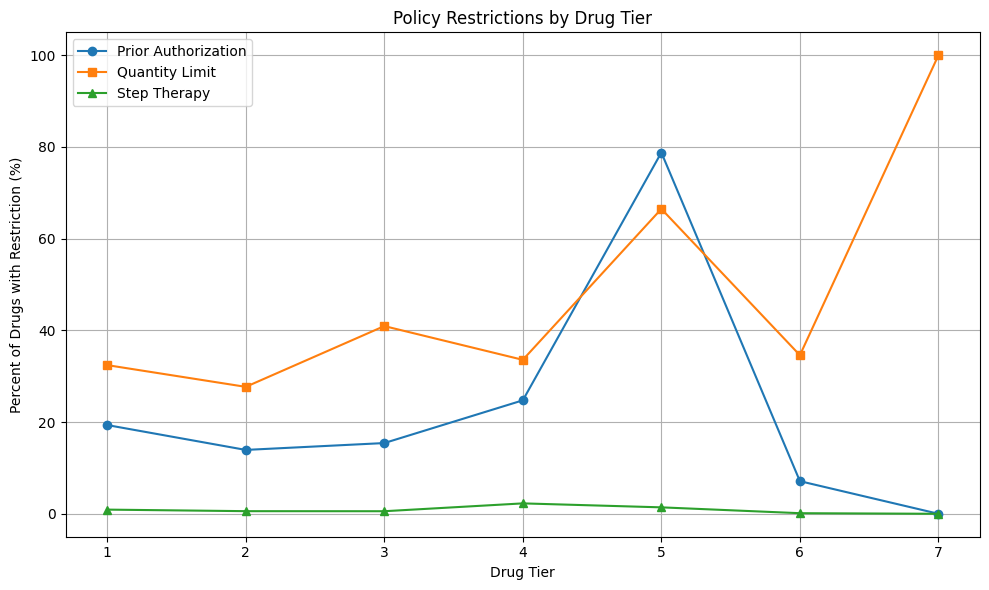

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

policy_summary_df = pd.read_json('policy_restrictions.json')

# policy_summary_df: columns - 'tier_level_value', 'percent_prior_authorization_yn_yes', 
# 'percent_quantity_limit_yn_yes', 'percent_step_therapy_yn_yes'

plt.figure(figsize=(10, 6))

plt.plot(policy_summary_df['tier_level_value'], policy_summary_df['percent_prior_authorization_yn_yes'], 
         marker='o', label='Prior Authorization')
plt.plot(policy_summary_df['tier_level_value'], policy_summary_df['percent_quantity_limit_yn_yes'], 
         marker='s', label='Quantity Limit')
plt.plot(policy_summary_df['tier_level_value'], policy_summary_df['percent_step_therapy_yn_yes'], 
         marker='^', label='Step Therapy')

plt.xlabel('Drug Tier')
plt.ylabel('Percent of Drugs with Restriction (%)')
plt.title('Policy Restrictions by Drug Tier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
policy_summary_df.to_json('policy_restrictions.json', orient='records', indent=4)

Are drugs in lower tiers less likely to require prior authorization?
Yes, the line for prior authorization shows lower percentages (around 13–19%) for tiers 1–4, while tiers 5 spike to nearly 79%. This indicates that lower-tier drugs generally have fewer administrative barriers, making patient access easier and faster compared to high-tier medications.

Do tiers with lower patient cost often have fewer step therapy requirements?
Yes, the percentage of drugs requiring step therapy is very low (close to 0–2%) for tiers 1–4, indicating minimal restrictions. There is a slight increase in tier 4, but overall, lower tiers correspond to less restrictive access, supporting faster treatment initiation.

Is there a tier where a much higher percentage of drugs require quantity limits?
Yes, tier 7 has a dramatic increase, with 100% of drugs subject to quantity limits. Additionally, tier 5 shows a noticeable increase (above 66%). This suggests that quantity limit restrictions are most concentrated in tier 7 and tier 5, which could impact medication adherence for these drugs.

Do higher drug tiers tend to cluster drugs with multiple restrictions (prior authorization, quantity limits, and step therapy) compared to lower tiers?
Yes, tier 5 stands out as having both high prior authorization (approximately 79%) and moderate quantity limits (around 66%), along with above-average step therapy requirements. This clustering of restrictions in higher tiers implies that patients face both higher costs and more hurdles in accessing these medicines.

Are there any tiers where policy restriction rates stand out as outliers compared to other tiers?
Yes, tier 7 distinctly stands out for quantity limits (100%). Tier 5 also shows a sharp spike for prior authorization and quantity limits compared to other tiers, marking these as outliers in terms of restriction prevalence. Any strategic changes that move drugs into or out of these tiers would have a significant impact on both patient and provider burden.